# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Ski data](#3.4.1_Ski_data)
    * [3.4.2 State-wide summary data](#3.4.2_State-wide_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top States By Order Of Each Of The Summary Statistics](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
      * [3.5.1.1 Total state area](#3.5.1.1_Total_state_area)
      * [3.5.1.2 Total state population](#3.5.1.2_Total_state_population)
      * [3.5.1.3 Resorts per state](#3.5.1.3_Resorts_per_state)
      * [3.5.1.4 Total skiable area](#3.5.1.4_Total_skiable_area)
      * [3.5.1.5 Total night skiing area](#3.5.1.5_Total_night_skiing_area)
      * [3.5.1.6 Total days open](#3.5.1.6_Total_days_open)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, we have a firm idea of what our data science problem is and have the data to solve it. The business problem was a general one of modeling resort ticket pricing and, by implication, revenue. We decided, based on data availability, that we would model `AdultWeekend` prices.

The data we started with contained some ticket price values, but with a number of missing values. This led to several rows being dropped completely. We also had two kinds of ticket prices. There were some obvious issues with some of the other features in the data. For example, one column was missing so many values it was completely dropped. Human errors in our data were corrected. We also obtained and cleaned some additional US state population and size data with which to augment the data set.

## 3.3 Imports<a id='3.3_Imports'></a>

In [220]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Ski Data<a id='3.4.1_Ski_data'></a>

Let's review our newly cleaned data set.

In [221]:
ski_data = pd.read_csv('../data/ski_data_cleaned.csv')

In [222]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               278 non-null    object 
 1   Region             278 non-null    object 
 2   state              278 non-null    object 
 3   summit_elev        278 non-null    int64  
 4   vertical_drop      278 non-null    int64  
 5   base_elev          278 non-null    int64  
 6   trams              278 non-null    int64  
 7   fastSixes          278 non-null    int64  
 8   fastQuads          278 non-null    int64  
 9   quad               278 non-null    int64  
 10  triple             278 non-null    int64  
 11  double             278 non-null    int64  
 12  surface            278 non-null    int64  
 13  total_chairs       278 non-null    int64  
 14  Runs               275 non-null    float64
 15  TerrainParks       234 non-null    float64
 16  LongestRun_mi      273 non

We have 278 rows and 25 columns. All typecasting is just as one would expect. But what does the data frame actually look like?

In [223]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


The data appear to be in "tidy" format and ready to use.

### 3.4.2 State-Wide Summary Data<a id='3.4.2_State-wide_summary_data'></a>

We'll load our state-level summary data as well, as our exploration will rely heavily on state-by-state comparisons.

In [224]:
state_summary = pd.read_csv('../data/state_summary.csv')

In [225]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        35 non-null     object 
 1   resorts_per_state            35 non-null     int64  
 2   state_total_skiable_area_ac  35 non-null     float64
 3   state_total_days_open        35 non-null     float64
 4   state_total_terrain_parks    35 non-null     float64
 5   state_total_nightskiing_ac   35 non-null     float64
 6   state_population             35 non-null     int64  
 7   state_area_sq_miles          35 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ KB


Aside from the `state` and `resorts_per_state` features, our data speak to resort skiing capacity, the amount of time available at each resort for skiers to ski, as well as the resort's context (i.e., the state's population and area in square miles). Below, we take a quick look at our state-level data.

In [226]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,20,21148.0,2583.0,78.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


All visible values appear reasonable and the data are in "tidy" format.

## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top States By Order Of Each Summary Statistic<a id='3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics'></a>

What does the state-wide picture look like for our market?

In [227]:
state_summary_newind = state_summary.set_index('state')

Below, we present data for ski resorts for our state of interest: Montana.

In [228]:
state_summary_newind[state_summary_newind.index == 'Montana'].head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
state,,,,,,,
Montana,12,21410.0,951.0,27.0,710.0,1068778,147040


In isolation, it's impossible to draw any definitive, or interesting, conclusions from this data.  Much like asset or company valuation, product pricing (our objective) is often done on a relative basis, though alternative approaches (e.g., "cost plus") do exist. The following cells compare Montana ski resorts to those both across the United States and regionally.

#### 3.5.1.1 Total state skiable area<a id='3.5.1.1_Total_state_area'></a>

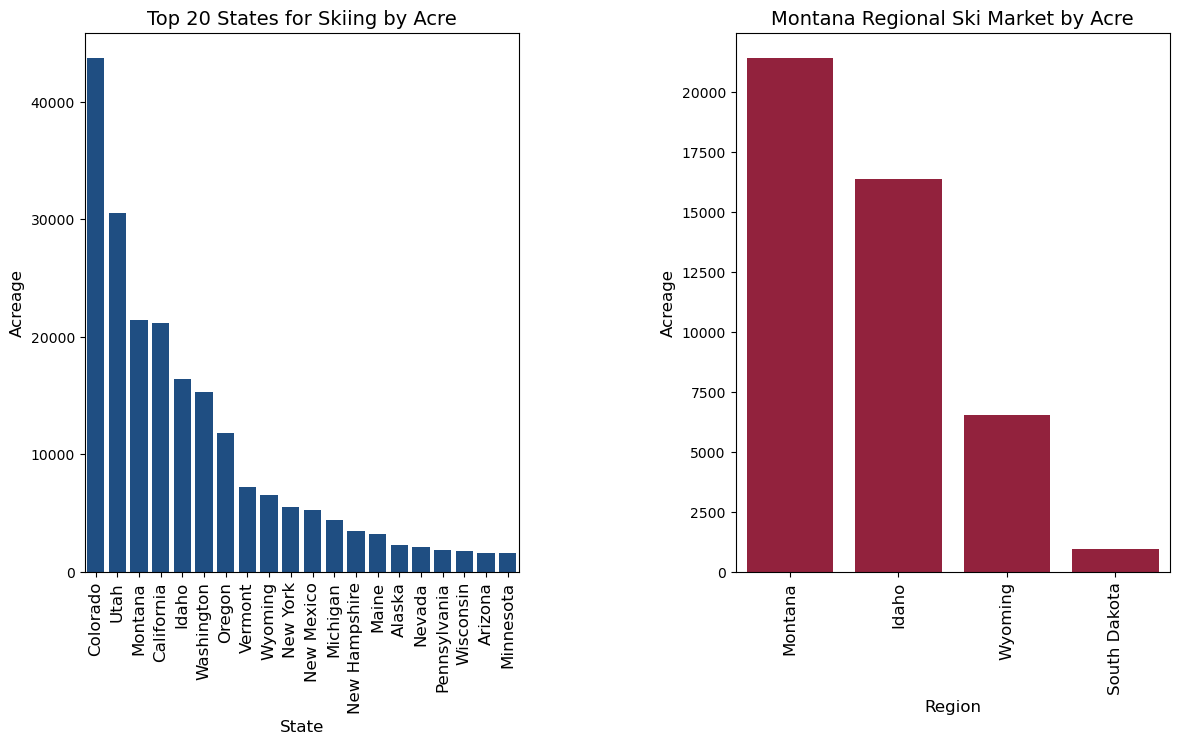

In [229]:
# take top 20 states by area
state_area = state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).reset_index().head(20)

# get only states near montana
state_area_regional = state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).reset_index()
state_regional = state_area_regional[state_area_regional['state'].isin(['Montana', 'Wyoming', 'North Dakota', 'South Dakota', 'Idaho'])]

# set total plot area
plt.rcParams["figure.figsize"] = (14,7)

# set space between plots https://stackoverflow.com/questions/43970609/
plt.subplots_adjust(hspace = 0.8, wspace = 0.5)

# https://www.youtube.com/watch?v=4DnWYK88-E4
plt.subplot(1,2,1)
sns.barplot(x='state', y='state_total_skiable_area_ac', color='#0f4d92', data=state_area)
plt.title('Top 20 States for Skiing by Acre', fontsize=14)
plt.xticks(rotation=90, fontsize=12);
plt.xlabel('State', fontsize=12)
plt.ylabel('Acreage', fontsize=12)

# create and style right barplot
plt.subplot(1,2,2)
sns.barplot(x='state', y='state_total_skiable_area_ac', color='#A41034', data=state_regional)
plt.title('Montana Regional Ski Market by Acre', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Acreage', fontsize=12)
plt.xlabel('Region', fontsize=12);


The plot on the left tells us Montana ranks third among the top 20 states in our data set by acre.  This is hardly surprising to anyone who has seen a map of the U.S.

The data raise a few interesting questions. First, how much of the total skiable area is developed and, by extension, how many skiable acres remain undeveloped? A large quantity of undeveloped skiable area in any state or region would invite competition. This would place downward pressure on prices, as resorts compete for above-market economic profits. Second, per Montana's local market, it is the largest state in its regional market. Should we anticipate a boom in resort construction in the Montana market and, by implication, a growing skiable area -- along with fiercer competition -- for Big Mountain specifically?

Given that our youngest resort is 6 years old, we doubt a sudden boom in resort construction is likely to hit Montana or any other state. Thus, we believe downward pressure on ticket prices from an influx of new competitors is unlikely.

#### 3.5.1.2 Total state population<a id='3.5.1.2_Total_state_population'></a>

While the United States is far from full, the population is not evenly distributed. California dominates the state population figures despite coming in second behind Alaska in size (by a considerable margin). Montana is the third largest state in our data set by area but is the 30th least populated. Thus, we conjecture Montana's low population density may be indicative of a low indigenous population of skiers. This implies there are fewer skiers in the immediate area, which means local demand may not be enough to support a high ticket price.

#### 3.5.1.3 Resorts per state<a id='3.5.1.3_Resorts_per_state'></a>

Here, we examine the ski resort count per state.  Surprisingly, overall state size is not dispositive when guessing the distribution of resorts across states.  Alaska is larger than California, yet it contains the 10th smallest number of resorts.  Montana has the 12th largest resort count.

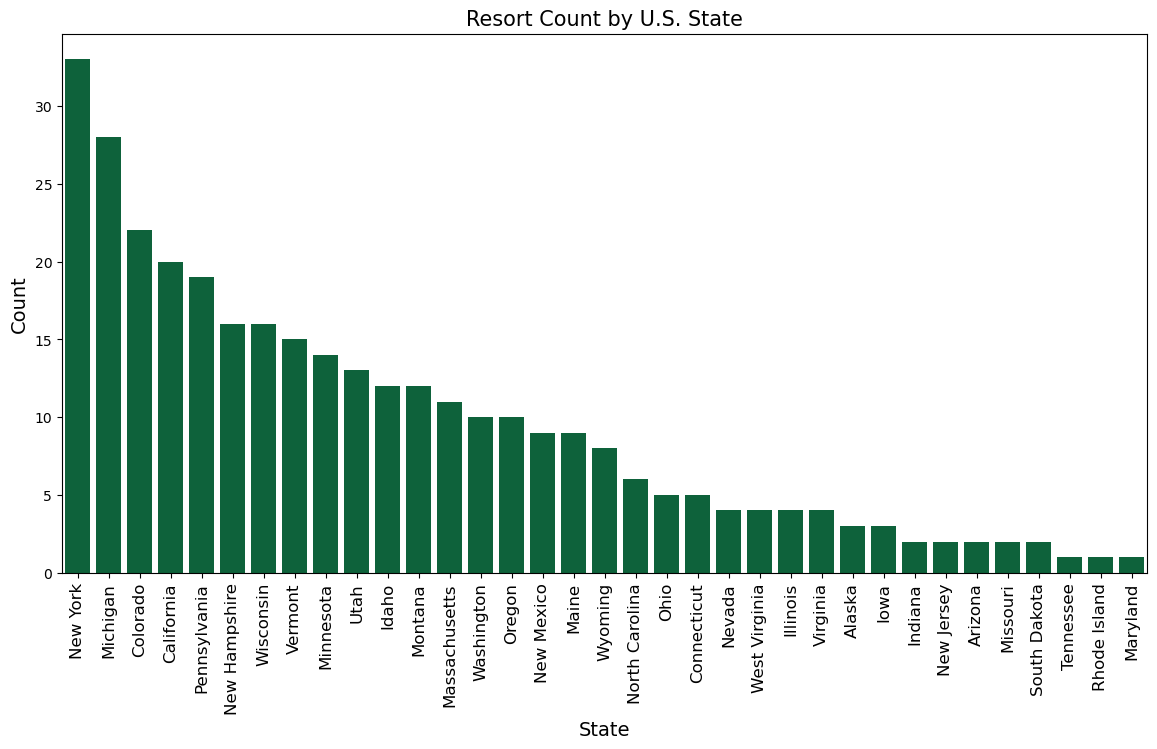

In [230]:
# set figure size & grab population per state data
plt.rcParams["figure.figsize"] = [16,8]
resort_count = state_summary_newind.resorts_per_state.sort_values(ascending=False).reset_index()

# set total plot area
plt.rcParams["figure.figsize"] = (14,7)

sns.barplot(x='state', y='resorts_per_state', color='#00703c', data=resort_count)
plt.title('Resort Count by U.S. State', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14);

New York comes out on top in our state-by-state resort count. Recall we saw shades of this during our data wrangling phase. This could be a function of its proximity to wealthy New Yorkers interested in skiing close to home. Then again, it could simply mean that Northern states are better locations for ski resorts. When is the last time you heard anyone mention going on their dream snow-skiing vacation in Alabama?

#### 3.5.1.4 Total skiable area<a id='3.5.1.4_Total_skiable_area'></a>

In light of the data considered above, it's impossible to infer how much skiable area is contained in each state. New York must contain a large amount of skiable terrain, as it is home to more than 30 resorts. Still, the only conclusion we can draw from this limited amount of information is that competition in the state of New York for skiers is robust.Below, we look at skiable acreage by state across the entire data set unlike the chart above, which focused on the top 20 states alone. 

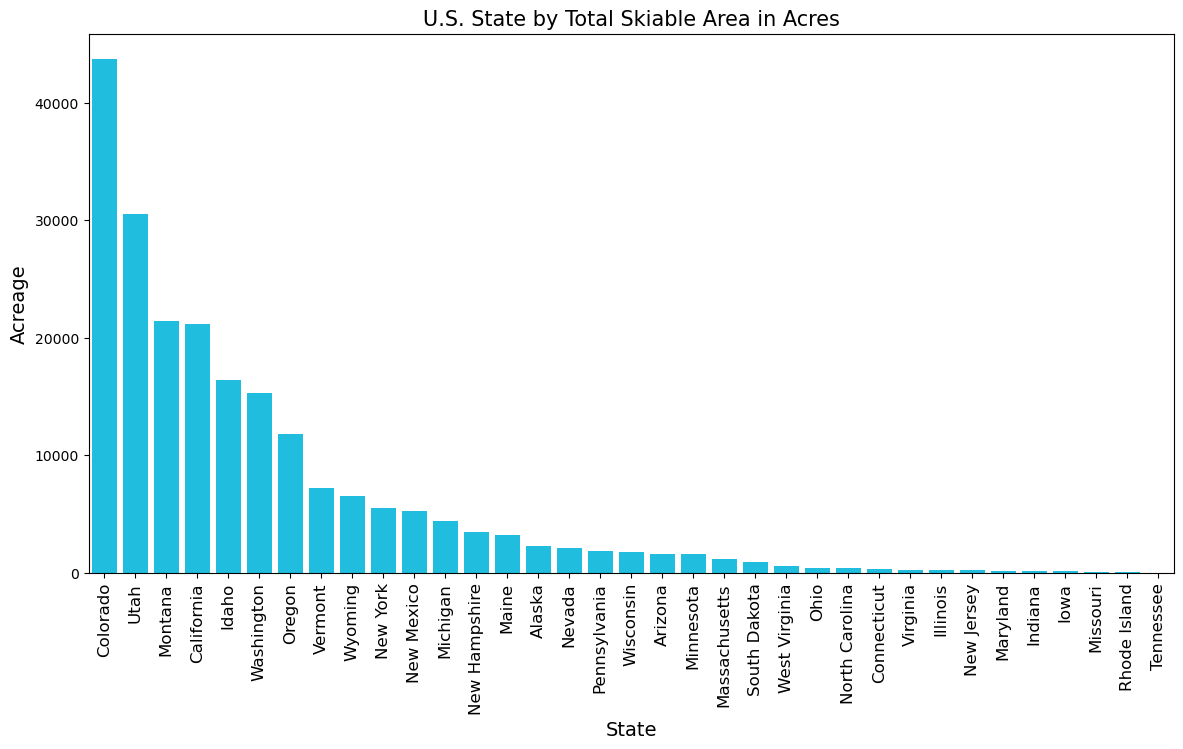

In [231]:
# set figure size & grab population per state data
plt.rcParams["figure.figsize"] = [16,8]
ski_area = state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).reset_index()

# set total plot area
plt.rcParams["figure.figsize"] = (14,7)

# data and styling for bar plot
sns.barplot(x='state', y='state_total_skiable_area_ac', color='#00d2ff', data=ski_area)
plt.title('U.S. State by Total Skiable Area in Acres', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('State', fontsize=14)
plt.ylabel('Acreage', fontsize=14);

New York may have the most resorts, but it does not maintain the most skiable acreage.  In fact, New York isn't even one of our top five states. As expected, Colorado is a skier’s paradise and comes in first, while Montana is ranked fourth.  This is far from a bad showing.

#### 3.5.1.5 Total night skiing area<a id='3.5.1.5_Total_night_skiing_area'></a>

Honestly, we did not know night skiing existed.  It sounds about as safe as night surfing in the Pacific, but we digress.  The plot below shows us the amount of acreage available for the intrepid night skier. 

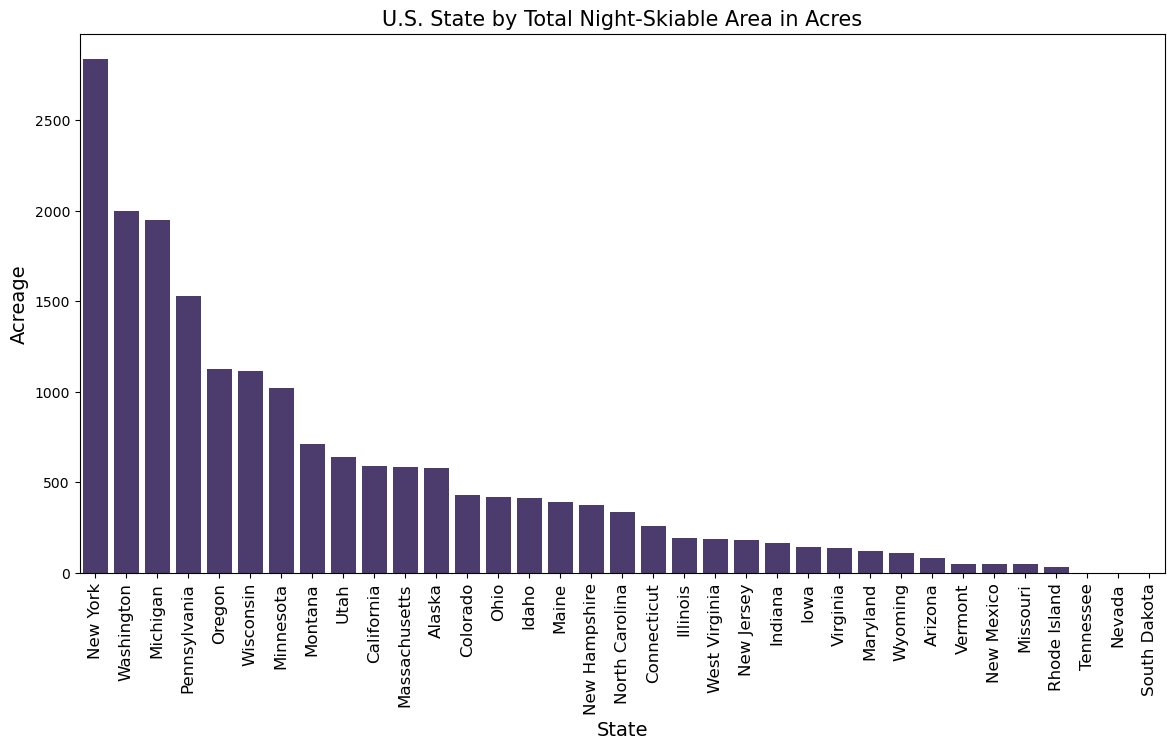

In [232]:
# set figure size & grab population per state data
plt.rcParams["figure.figsize"] = [16,8]
nights = state_summary_newind.state_total_nightskiing_ac.sort_values(ascending=False).reset_index()

# set total plot area
plt.rcParams["figure.figsize"] = (14,7)

# data and styling for bar plot
sns.barplot(x='state', y='state_total_nightskiing_ac', color='#483475', data=nights)
plt.title('U.S. State by Total Night-Skiable Area in Acres', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('State', fontsize=14)
plt.ylabel('Acreage', fontsize=14);

New York dominates the area of skiing available at night.  With one mid-Atlantic exception, the top 5 are Northern states. Is night skiing in and of itself an appeal to customers, or is it a consequence of simply trying to extend the skiing day where days are shorter? Is New York's domination here because it's trying to maximize its appeal to local visitors? 

Clearly, our data generates more interesting questions than answers.  This is a positive sign! Executive sponsors and data providers may be able to provide additional information.  For example, the "number of night tickets," "number of day tickets," and "number of weekly passes" sold.

#### 3.5.1.6 Total days open<a id='3.5.1.6_Total_days_open'></a>

The cumulative total days open for all resorts in each state yielded an interesting result.

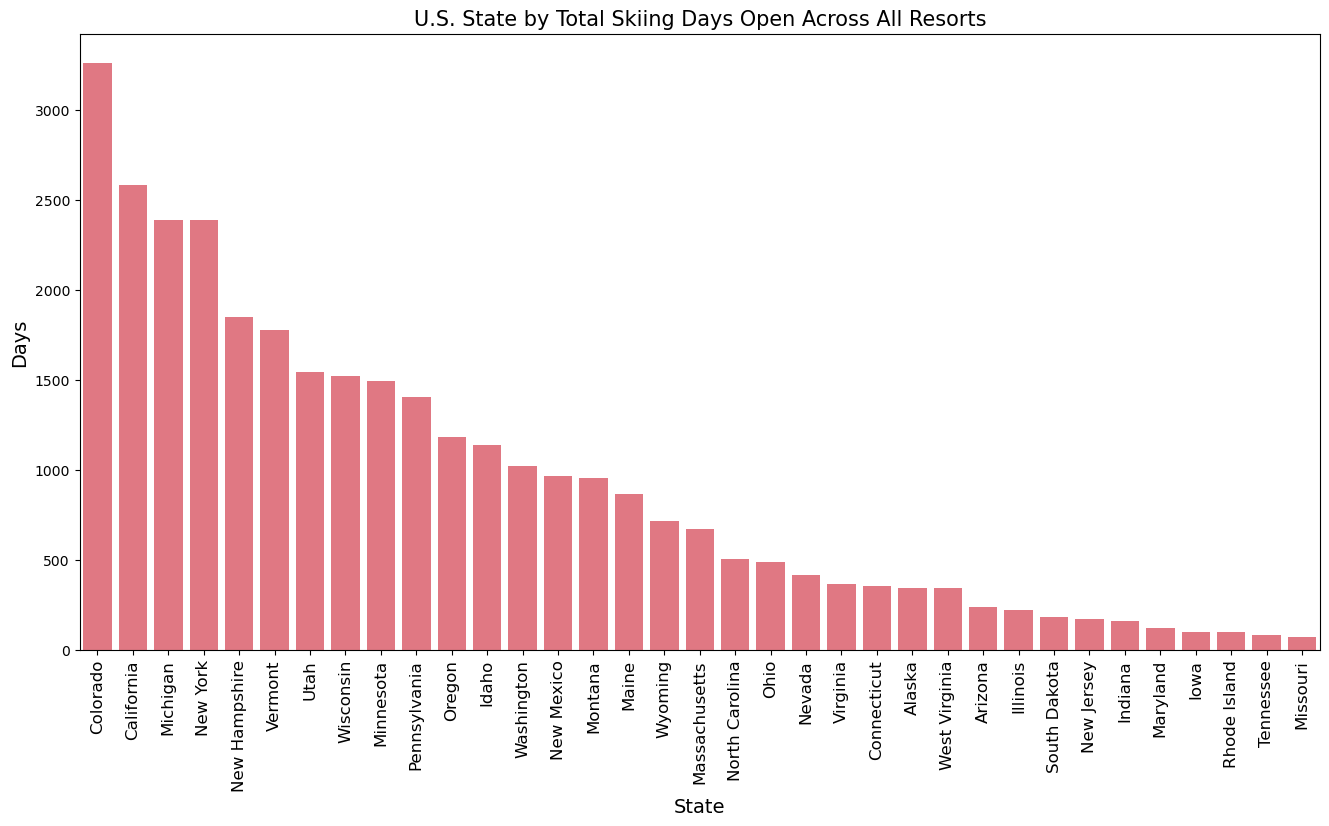

In [233]:
# set figure size & grab state data
plt.rcParams["figure.figsize"] = [16,8]
days = state_summary_newind.state_total_days_open.sort_values(ascending=False).reset_index()


# data and styling for bar plot
sns.barplot(x='state', y='state_total_days_open', color='#F16775', data=days)
plt.title('U.S. State by Total Skiing Days Open Across All Resorts', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('State', fontsize=14)
plt.ylabel('Days', fontsize=14);

The total days open seems to bear some resemblance to the number of resorts.  This is reasonable. The more resorts in a state the greater the chances a resort will be open at any point in the season, thus, the state will have more ski days.  

New Hampshire is an interesting case. It made it into the top five, despite being a small state that didn't make it into the top five for resorts per state.  This is likely due both to its average annual snowfall of 60" to 150" and its proximity to New York and, oft overlooked, Connecticut.  The Granite State is not without competition.  Vermont and Maine have comparable snowfall and are two of New Hampshire's neighbors, yet they are not ranked next to one another. In fact, Maine is ranked 16th, just after Montana in our 15th spot.

### 3.5.2 Resort Density<a id='3.5.2_Resort_density'></a>

There is a fair amount of heterogeneity in our data set with respect to ski destinations. The U.S. has large states that are not necessarily populous, as well as small states that are densely populated. Some states host far more resorts than others, while other states maintain a larger total-skiing area. States with the most total days skiing per season are not necessarily those with the most resorts. New York is well equipped for night-skiing enthusiasts and has the most resorts.

State size and/or population doesn't seem to tell us much. Relative comparisons like the ratio of resorts serving a given population or area may be fruitful to explore. Such metrics could provide insight into resort density.

In [234]:
# The 100_000 scaling is based on eyeballing the magnitudes of the data
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,20,21148.0,2583.0,78.0,587.0,0.050617,12.217844
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


Calculating resorts per 100,000 people and 100,000 square miles provides us with a window into resort density relative to each state's population and size.

Our population level data has a pronounced right skew; it cannot go below zero.  This lower bound is responsible for the data's abnormal shape.  The rightmost bars consist largely of states where few resorts reside and states whose populations dwarf the number available resorts.

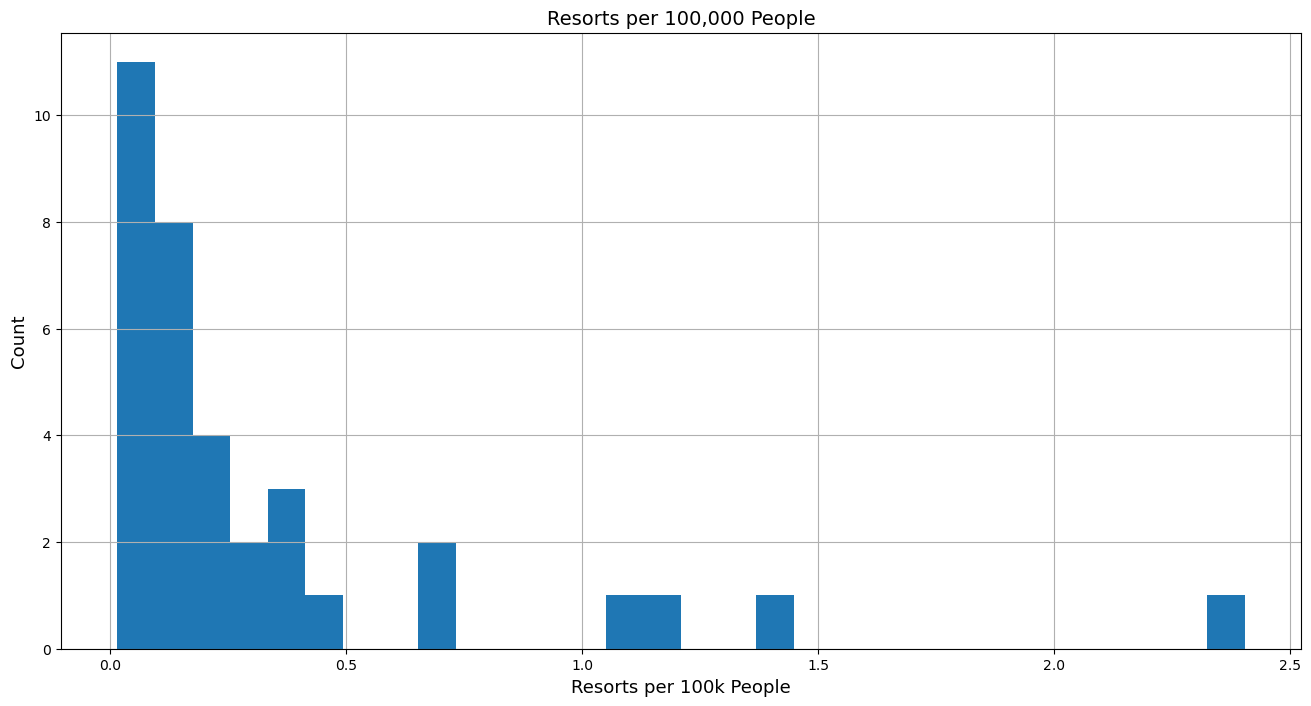

In [235]:
plt.rcParams["figure.figsize"] = [16,8]
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.title('Resorts per 100,000 People', fontsize=14)
plt.xlabel('Resorts per 100k People', fontsize=13)
plt.ylabel('Count', fontsize=13);

Our data concerning resorts per 100k square miles has a similarly pronounced right skew for the same reasons listed above. The rightmost bars consist largely of states where few resorts reside and states that are quite large.

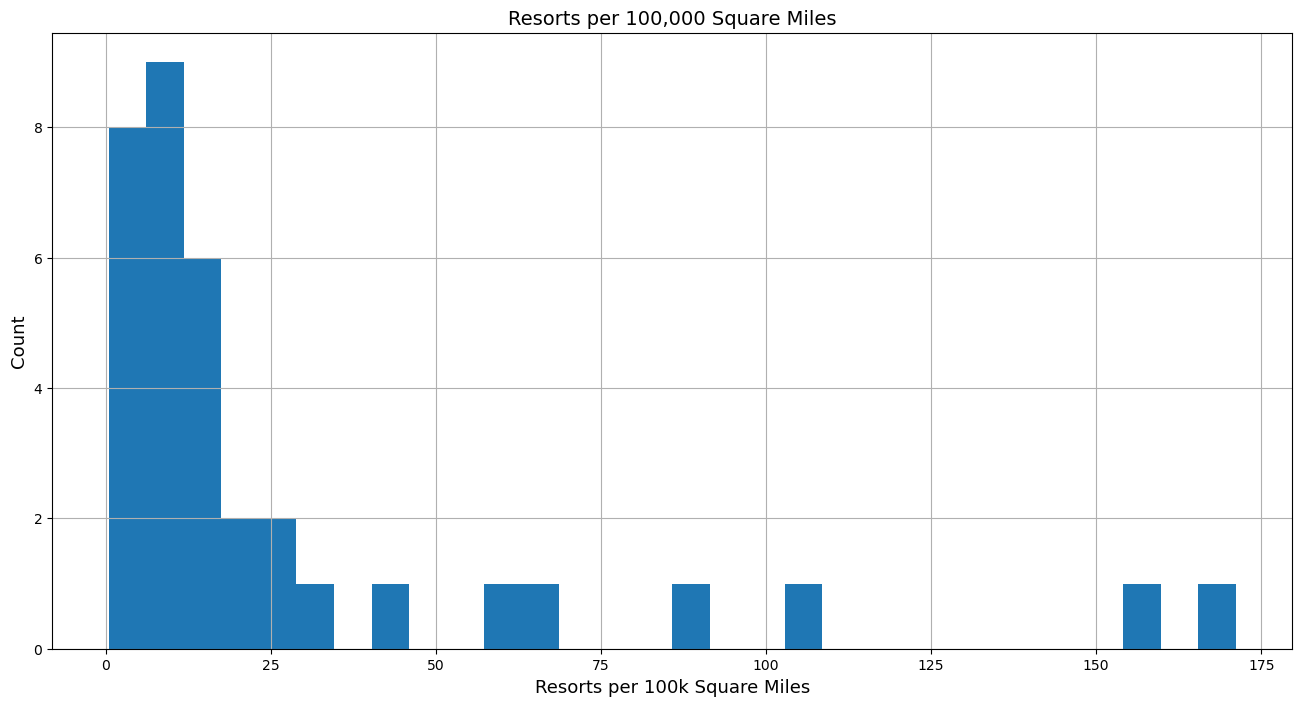

In [236]:
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('Count')
plt.title('Resorts per 100,000 Square Miles', fontsize=14)
plt.xlabel('Resorts per 100k Square Miles', fontsize=13)
plt.ylabel('Count', fontsize=13);

Despite the pronounced skew of both distributions, there is a disernable area of clustering.

#### 3.5.2.1 Top states by resort density<a id='3.5.2.1_Top_states_by_resort_density'></a>

Looking at resorts per capita, we see not only which states are top destinations, but also where Montana fits among them.

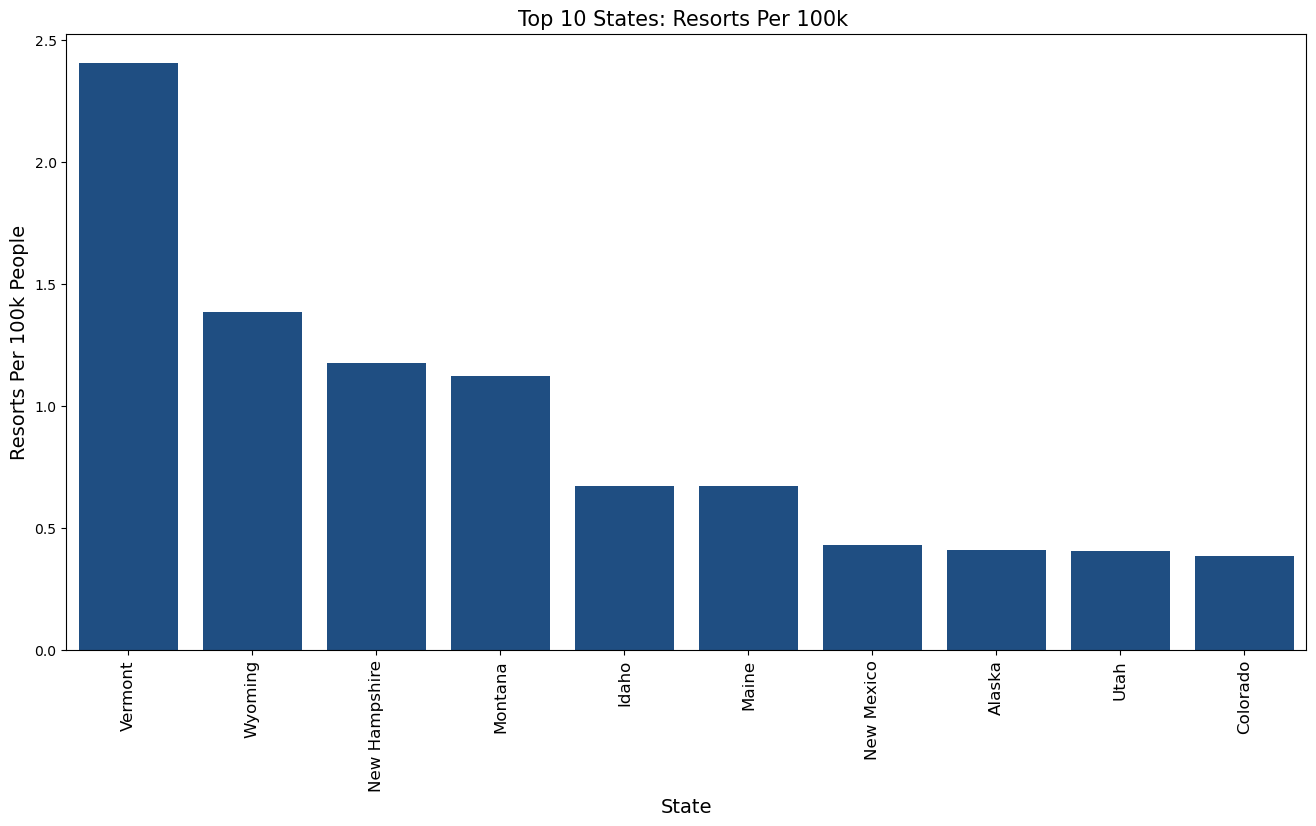

In [237]:
top_ten_capita = state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).reset_index()

# set figure size & grab state data
plt.rcParams["figure.figsize"] = [16,8]
top_ten_capita = top_ten_capita.iloc[0:10, :]

# data and styling for bar plot
sns.barplot(x='state', y='resorts_per_100kcapita', color='#0f4d92', data=top_ten_capita)
plt.title('Top 10 States: Resorts Per 100k ', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('State', fontsize=14)
plt.ylabel('Resorts Per 100k People', fontsize=14);

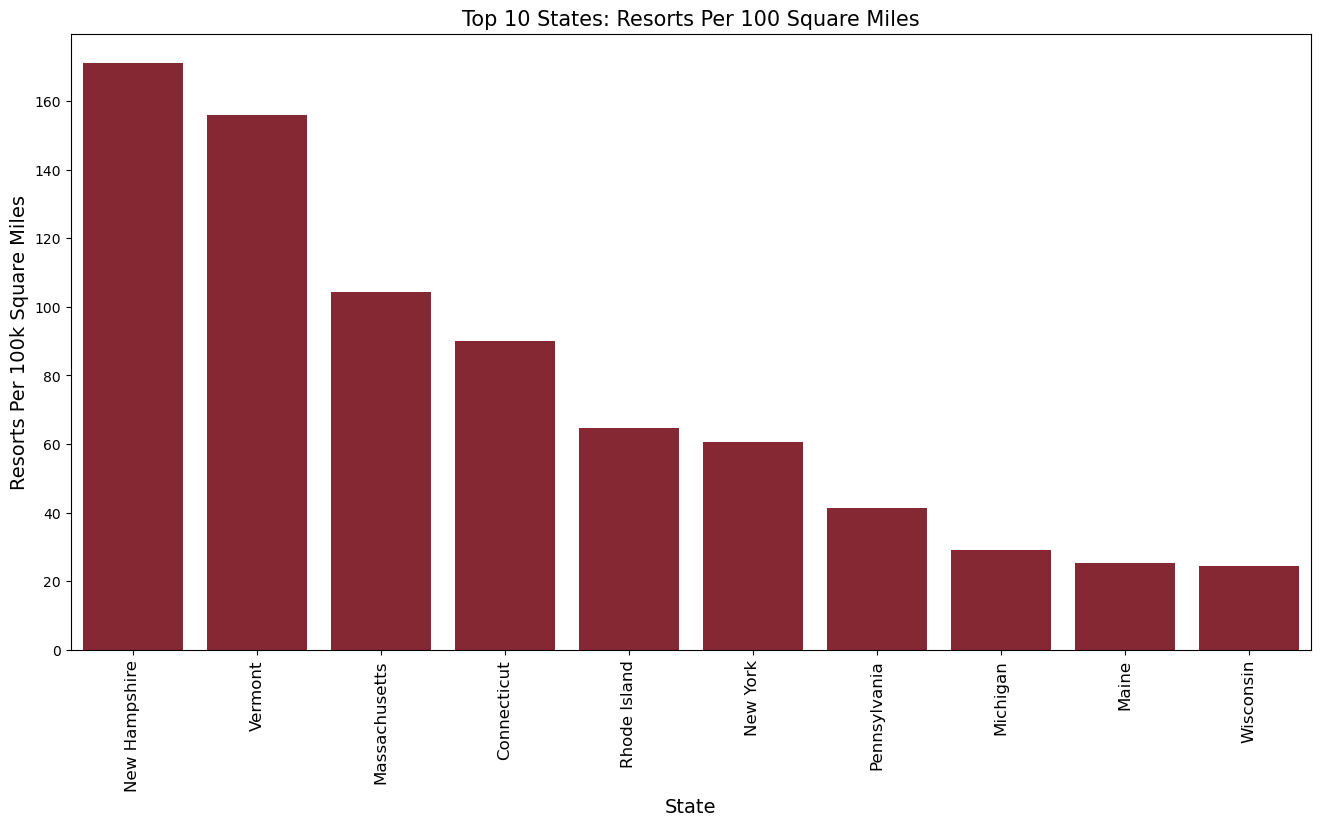

In [238]:
top_ten_area = state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).reset_index()

# set figure size & grab state data
plt.rcParams["figure.figsize"] = [16,8]
top_ten_area = top_ten_area.iloc[0:10, :]

# data and styling for bar plot
sns.barplot(x='state', y='resorts_per_100ksq_mile', color='#951829', data=top_ten_area)
plt.title('Top 10 States: Resorts Per 100 Square Miles', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('State', fontsize=14)
plt.ylabel('Resorts Per 100k Square Miles', fontsize=14);

It's no surprise why New Hampshire, Vermont, Massachusetts, Connecticut, and Rhode Island lead the pack in resorts per 100,000 square miles: All are small states with extremely heavy snowfall.

### 3.5.3 Visualizing High Dimensional Data<a id='3.5.3_Visualizing_High_Dimensional_Data'></a>

We have an overview of the U.S. ski market and state-level statistics that could assist us in our primary task: pricing weekend tickets to ski in Montana. It's highly unlikely that all statistics are of equal value. One way to disentangle this interconnected web of relationships is via [principle components analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA). Applying PCA to our design matrix will help us locate linear combinations of features that are uncorrelated with one another and order these derivative features by the amount of variance they explain. We can then use this information to visualize the data in a lower dimension (e.g., 2 down from 7) and quantify how much variance each component explains. We also have the option of exploring how our original features contribute to PCA-derived features.

The basic steps in this process are:

   1. Scale the data (important here because our features are heterogenous).
   2. Fit the PCA transformation to our design matrix by "learning" it from the data. 
   3. Apply the transformation to the data, creating derived features.
   4. Optionally, look for patterns in the data using the aforementioned derived features and explore related coefficients.

#### 3.5.3.1 Scale the data<a id='3.5.3.1_Scale_the_data'></a>

We want numeric data here, yet need the state labels.  Hence, it's wise to hang onto these and set the state as the index.  We also want to capture the column names.  This is inevitably a step in almost every data science project.

In [239]:
# Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = state_summary.set_index('state')

# Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index

# Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,20,21148.0,2583.0,78.0,587.0,0.050617,12.217844
Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


A cursory glance at the features above reveals our data are on vastly different scales.  Standardization will remedy the situation, preventing values large in magnitude from dominating our analysis going forward.

In [240]:
state_summary_scale = scale(state_summary_scale)

Note, `scale()` returns an ndarray, so we lose all column names.  Because we want to visualise scaled data, we had the foresight to copy feature names to a separate variable. Now we can construct a data frame from the ndarray and reintroduce the column names.

In [241]:
# Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.808768,-0.387854,-0.691515,-0.821448,0.067082,0.138745,-0.690613
1,-0.935704,-0.460022,-0.822973,-0.731742,-0.702208,-0.645608,-0.658740
2,1.349155,1.549085,2.032602,2.497663,0.077852,-0.598171,-0.402928
3,1.603028,3.862367,2.854219,2.318252,-0.166782,0.081217,-0.184924
4,-0.554894,-0.585162,-0.681777,-0.552331,-0.431418,-0.414443,1.503712


##### 3.5.3.1.1 Verifying the scaling<a id='3.5.3.1.1_Verifying_the_scaling'></a>

Below, we validate our steps.  When there's money on the line for the client, we would be remiss if we skipped this step.

First, we check the mean of the scaled features using Panda's `mean()` data frame method.

In [242]:
# Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

resorts_per_state             -3.568574e-17
state_total_skiable_area_ac    6.066576e-17
state_total_days_open         -3.965082e-17
state_total_terrain_parks      2.854859e-17
state_total_nightskiing_ac     1.903239e-17
resorts_per_100kcapita        -5.075305e-17
resorts_per_100ksq_mile       -4.123686e-17
dtype: float64

All means are vanishingly small and effectively zero. 

Similarly, we check feature standard deviation using Pandas `std()` data frame method.

In [243]:
# Call `state_summary_scaled_df`'s `std()` method
state_summary_scaled_df.std().head()

resorts_per_state              1.014599
state_total_skiable_area_ac    1.014599
state_total_days_open          1.014599
state_total_terrain_parks      1.014599
state_total_nightskiing_ac     1.014599
dtype: float64

One would think the numbers would be closer to 1 than this.  The `scale()` method, however, uses the biased estimator for standard deviation (dof=0). This doesn't mean our approach is deficient.  Rather, it indicates `scale()` calculates sample standard deviation using the number of all observations provided.  The `std()` method, on the other hand, defaults to using dof=1, that is it's normalized by N-1. Restated, the `std()` function assumes we want the best estimate of the population parameter based on the given sample and uses Bessel's correction to achieve this result. We can tell it to return the biased estimate instead, so as to match the results of `scale()`.

If the reader is concerned about our indifference to Bessel's correction, don't be. We have the entire population we need and, thus, can side-step the Bessel.

In [244]:
# Call `std()` & pass in ddof=0 
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

Now our standard deviation calculations are consistent with both our scaled values and expectations.  This exercise illustrates how different routines that do ostensibly the same thing can exhibit unanticipated behavior.  Hence, we validate our work.

#### 3.5.3.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

#### Fit the PCA transformation using the scaled data.

In [245]:
state_pca = PCA().fit(state_summary_scale)

Plot the cumulative variance ratio with number of components.

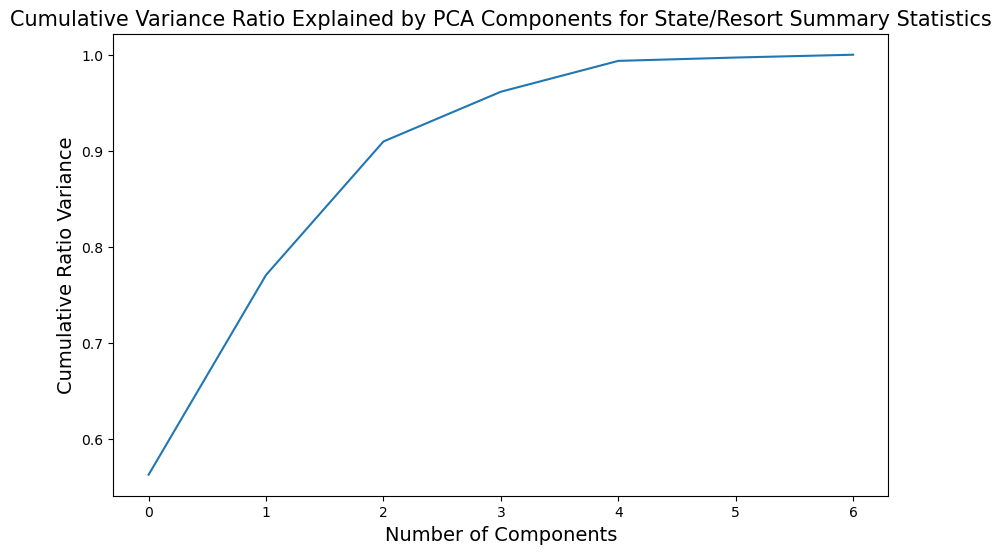

In [246]:
# Visualize the cumulative explained variance ratio with number of components
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum(), linewidth=1.5)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Ratio Variance', fontsize=14)
plt.title('Cumulative Variance Ratio Explained by PCA Components for State/Resort Summary Statistics', fontsize=15);

The first two components seem to account for over 75% of the variance, and the first four for over 95%.

In [247]:
# Apply the transformation to the data to obtain the derived features.
state_pca_x = state_pca.transform(state_summary_scale)

In [248]:
# Validate the output by checking design matrix dimensions
state_pca_x.shape

(35, 7)

Below, we plot the first two derived features (the first two principle components) and label each point with the name of the state.  The code extracts and plots the first and second columns from the transformed data (`state_pca_x`) as x and y coordinates.  Recall we retained our state labels to enable the annotation of the plot using the aptly named `plt.annotate` function.  We use the second (i.e., index 1) value of the cumulative variance ratio and include it in our plot's title. This boldly highlights the percentage variance explained by the two PCA components we've plotted. We finish by creating an appropriately sized and well-labelled scatterplot to convey all of this information.

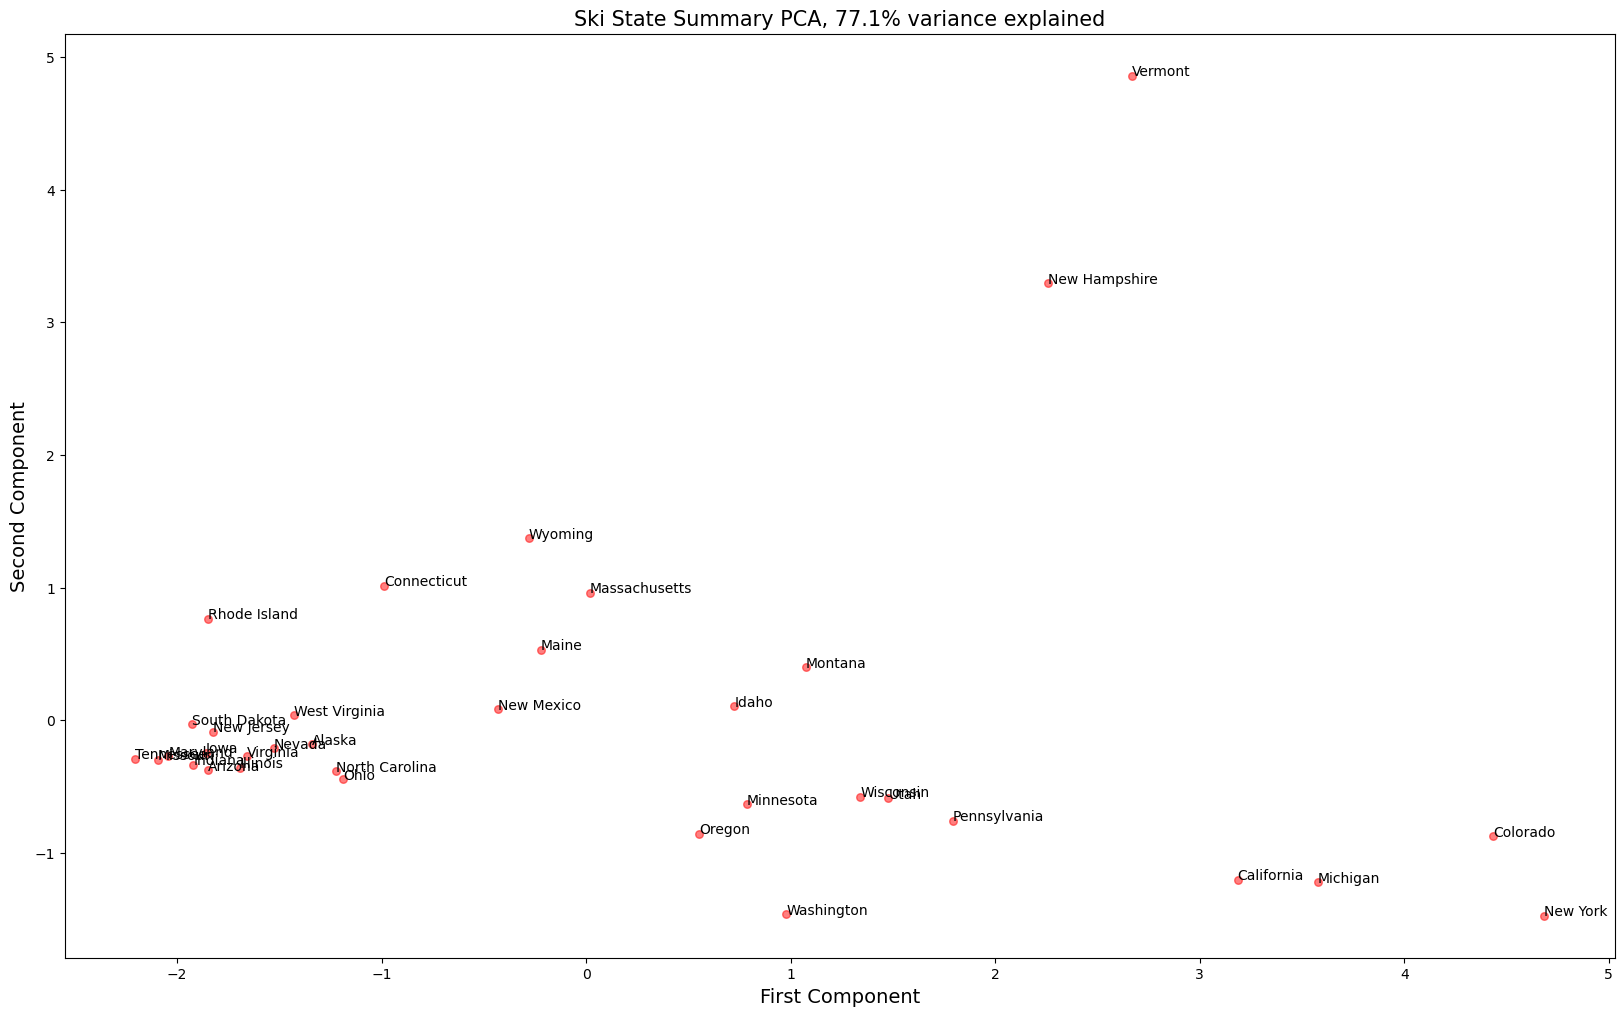

In [249]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(20,12))
plt.scatter(x=x, y=y, s=30, alpha=0.5, c='red')
plt.xlabel('First Component', fontsize=14)
plt.ylabel('Second Component', fontsize=14)
plt.title(f'Ski State Summary PCA, {pc_var:.1f}% variance explained', fontsize=15)
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

#### 3.5.3.3 Average ticket price by state<a id='3.5.3.3_Average_ticket_price_by_state'></a>

Here, all point markers for the states are the same size and color. We've visualized relationships between the states based on features such as the total skiable terrain area, but our ultimate interest lies in adult weekend ticket prices.  We know ticket prices for resorts in each state, so it might be interesting to see if there's any pattern there.

Western states, followed by a mix of mid-Atlantic and Northeastern and Northwestern states have the highest adult weekend prices.  This doesn't bode well for Montana, which is fourth from the bottom of our top 30 states for skiing. 

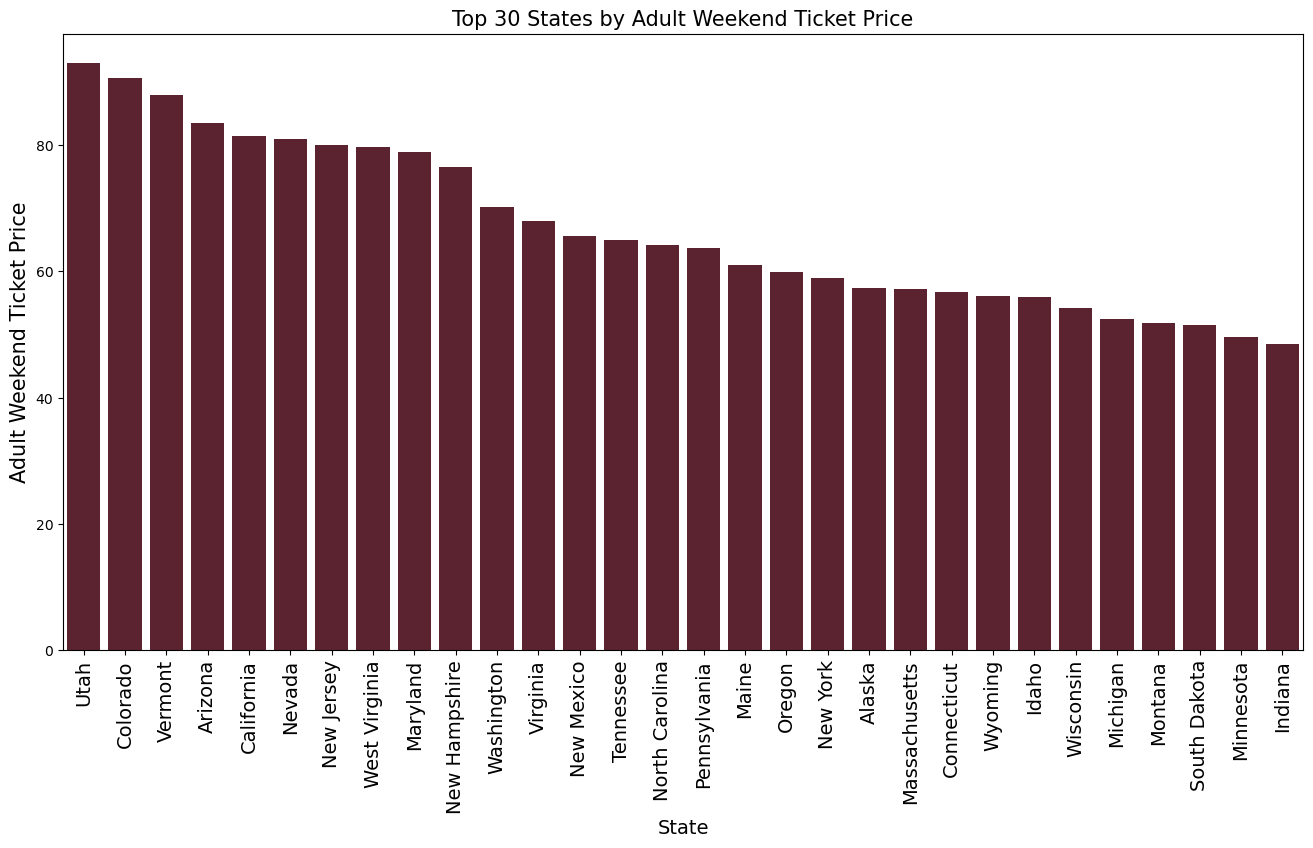

In [250]:
# Calculate the average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean().reset_index().sort_values(ascending=False, by='AdultWeekend')
plt.rcParams["figure.figsize"] = [16,8]

state_avg_price = state_avg_price.iloc[0:30, :]

# data and styling for bar plot
sns.barplot(x='state', y='AdultWeekend', color='#641A2B', data=state_avg_price)
plt.title('Top 30 States by Adult Weekend Ticket Price', fontsize=15)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('State', fontsize=14)
plt.ylabel('Adult Weekend Ticket Price', fontsize=15);

The admittedly less aesthetically pleasing plot below confirms what we see above: We see clusters near 80 (Utah, Colorado, Vermont), as well as a substantial block of resorts that cluster between 40 and 60, which includes Montana.

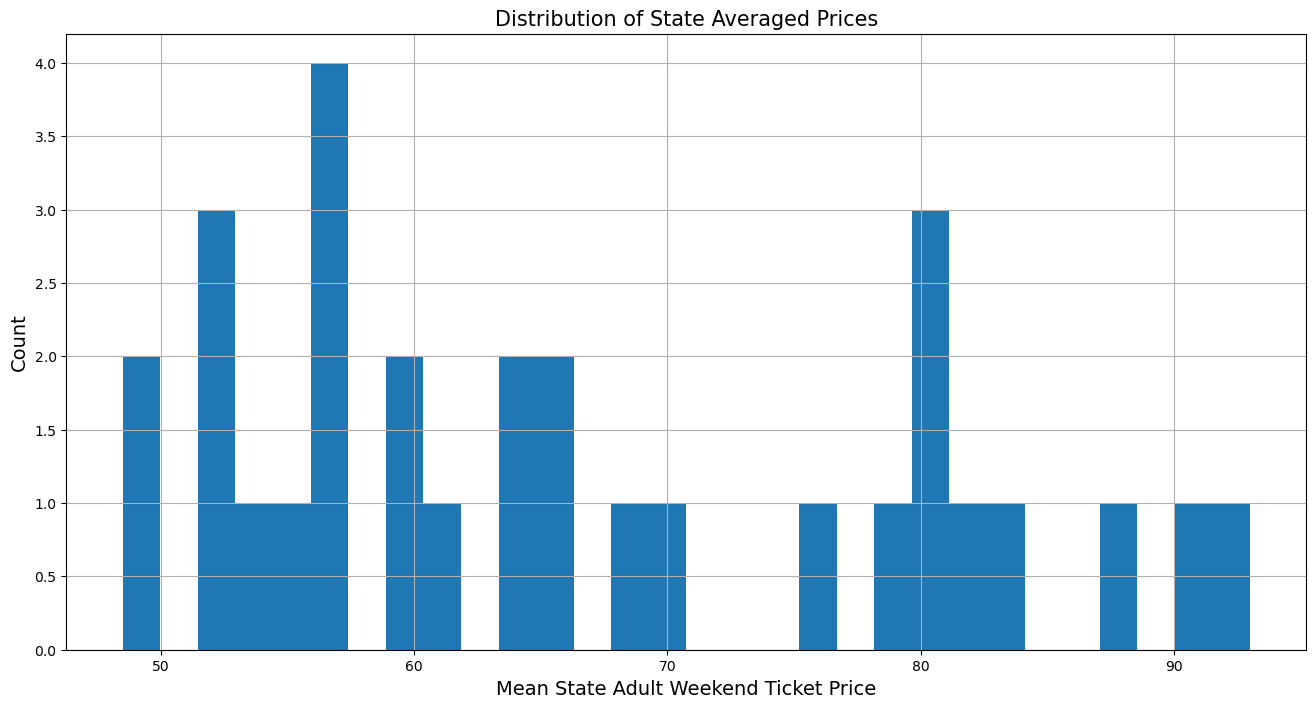

In [251]:
plt.rcParams["figure.figsize"] = [16,8]
state_avg_price.hist(bins=30)
plt.title('Distribution of State Averaged Prices', fontsize=15)
plt.xlabel('Mean State Adult Weekend Ticket Price', fontsize=14)
plt.ylabel('Count', fontsize=14);

#### 3.5.3.4 Adding average ticket price to scatter plot<a id='3.5.3.4_Adding_average_ticket_price_to_scatter_plot'></a>

There's a lot to unpack here.  We extracted indexes and column names from a data frame and the first two principle components from an array. It's becoming a bit hard to keep track of them all.  Below we create a new data frame to do this.

In [252]:
# Create a dataframe containing the values of the first two PCA components
pca_df = pd.DataFrame({'PC1': state_pca_x[:, 0], 'PC2': state_pca_x[:, 1]}, index=state_summary_index)
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.339200,-0.178909
Arizona,-1.847611,-0.375977
California,3.185039,-1.201587
Colorado,4.433141,-0.873170
Connecticut,-0.986216,1.013886


That worked, and we have the states to use as an index! Now, let us reformat our average price data.

In [253]:
# our average state prices also have state as an index
state_avg_price = state_avg_price.reset_index().set_index('state')
state_avg_price.head(50)

,index,AdultWeekend
state,,
Utah,27,93.000000
Colorado,3,90.714286
Vermont,28,87.900000
Arizona,1,83.500000
California,2,81.416667
Nevada,16,81.000000
New Jersey,18,79.990000
West Virginia,31,79.750000
Maryland,10,79.000000


Here, we concatenate both of the above parts on axis 1 and using the indexes.

In [254]:
# Concatenate `pca_df` and `state_avg_price` along axis 1
state_avg_price = state_avg_price.drop(['index'], axis=1, inplace=False)
pca_df = pd.merge(pca_df, state_avg_price, left_index=True, right_index=True)
pca_df.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.339200,-0.178909,57.333333
Arizona,-1.847611,-0.375977,83.500000
California,3.185039,-1.201587,81.416667
Colorado,4.433141,-0.873170,90.714286
Connecticut,-0.986216,1.013886,56.800000


There seems to be a wide range of average ticket price histogram above, but it may be hard to pick out differences when using the value for point size.  Consequently, we add another column where we seperate these prices into quartiles; that might show something.

In [255]:
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1)
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.339200,-0.178909,57.333333,"(56.3, 63.9]"
Arizona,-1.847611,-0.375977,83.500000,"(79.6, 93.0]"
California,3.185039,-1.201587,81.416667,"(79.6, 93.0]"
Colorado,4.433141,-0.873170,90.714286,"(79.6, 93.0]"
Connecticut,-0.986216,1.013886,56.800000,"(56.3, 63.9]"


In [256]:
# Note that Quartile is a new data type: category
pca_df.dtypes

PC1              float64
PC2              float64
AdultWeekend     float64
Quartile        category
dtype: object

We have no missing values and can clearly see that our design matrix makes sense!

In [257]:
pca_df.head(50)

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.339200,-0.178909,57.333333,"(56.3, 63.9]"
Arizona,-1.847611,-0.375977,83.500000,"(79.6, 93.0]"
California,3.185039,-1.201587,81.416667,"(79.6, 93.0]"
Colorado,4.433141,-0.873170,90.714286,"(79.6, 93.0]"
Connecticut,-0.986216,1.013886,56.800000,"(56.3, 63.9]"
Idaho,0.725129,0.105061,55.900000,"(48.4, 56.3]"
Indiana,-1.921248,-0.335827,48.500000,"(48.4, 56.3]"
Maine,-0.223140,0.531707,61.000000,"(56.3, 63.9]"
Maryland,-2.043400,-0.272262,79.000000,"(63.9, 79.6]"


We now have enough information to recreate the scatterplot, now adding marker size for ticket price and colour for the discrete quartile.  Notice in the code below how we iterate over each quartile and plot the points in the same quartile group as one. This creates an informative legend containing quartiles with points coloured by quartile and sized by ticket price (higher prices are represented by larger point markers).

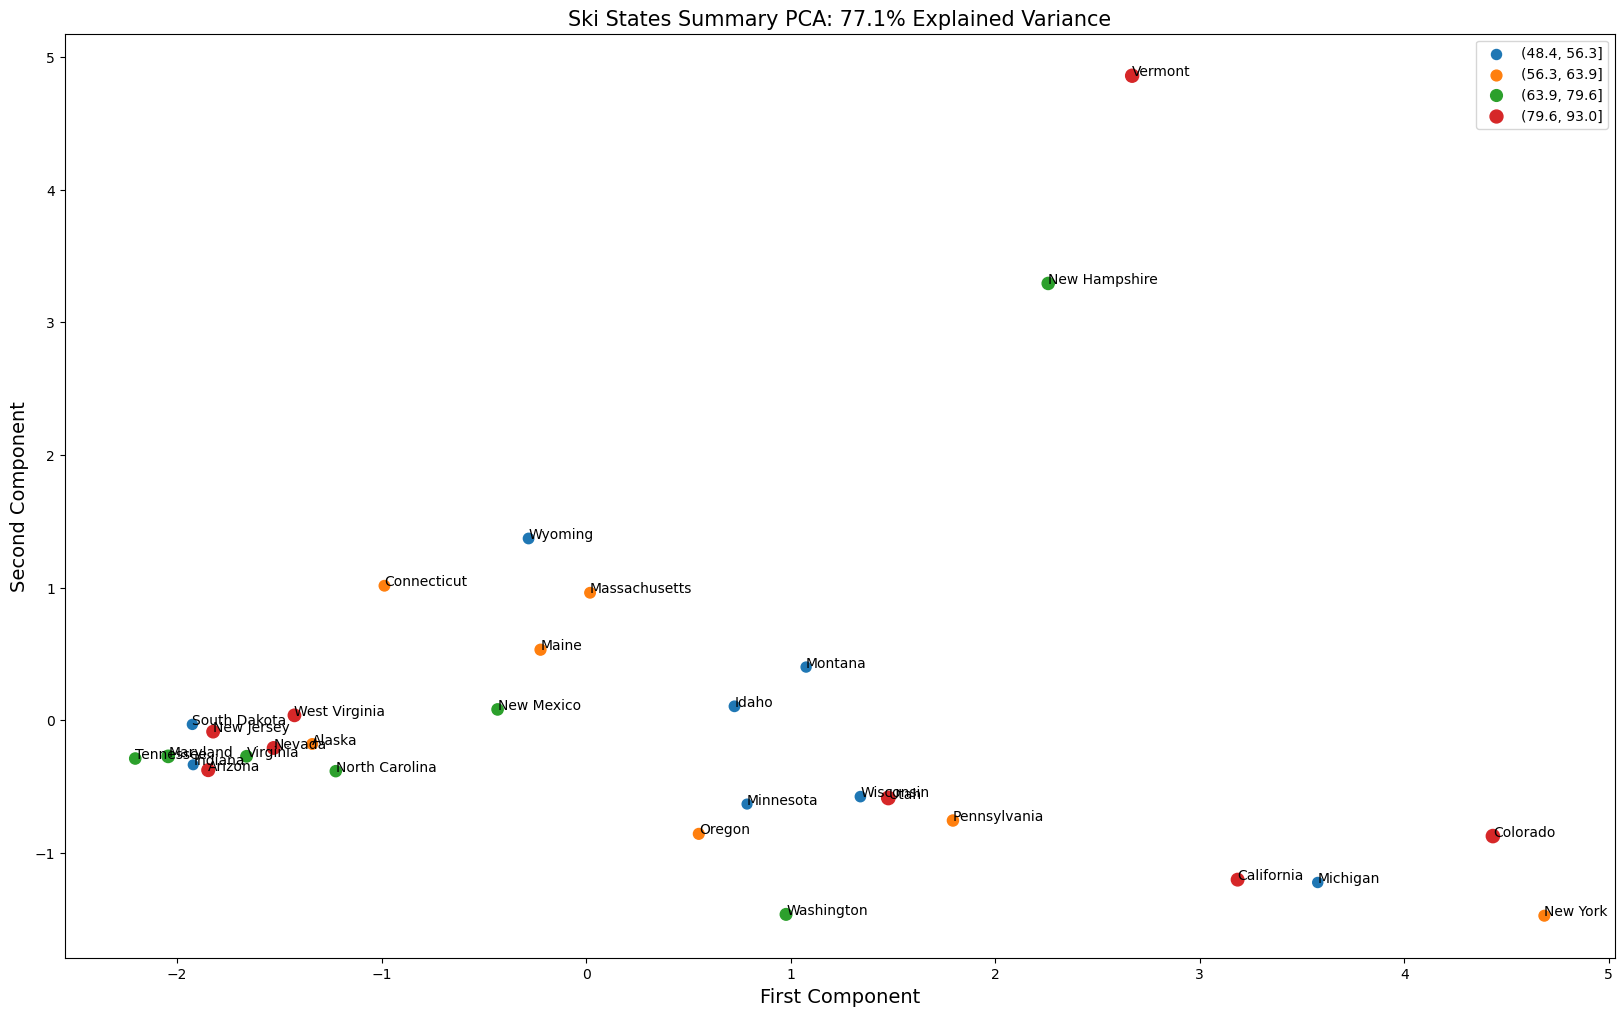

In [258]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.AdultWeekend
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(20,12))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First Component', fontsize=14)
ax.set_ylabel('Second Component', fontsize=14)
plt.legend()
ax.set_title(f'Ski States Summary PCA: {pc_var:.1f}% Explained Variance', fontsize=15)
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

Below, we can see how many properties fell into each quartile. The lowest and second highest quartiles had 8 and 7 properties, respectively. The two remaining quartiles also had 8 and 7 properties with 8 resorts falling into the highest quartile and 7 resorts falling into the second lowest. 

In [259]:
pca_df.Quartile.value_counts()

(48.4, 56.3]    8
(79.6, 93.0]    8
(56.3, 63.9]    7
(63.9, 79.6]    7
Name: Quartile, dtype: int64

We see the same distribution of states in the dot plot above before, but with additional information about average price. There isn't an obvious pattern. The red points representing the upper quartile of price can be seen to the left, the right, and top. There's also significant spread among other quartiles. In this representation of the ski summaries for each state, which accounts for some 77% of the variance, there is simply no price pattern. The only noteworthy feature is that, with respect to Montana, principal component 1 accounts for slightly more of the variance than principal component 2.

Let's adjust our plot so that it contemplates ticket price, as doing so may help us better understand the spread of the data before us.

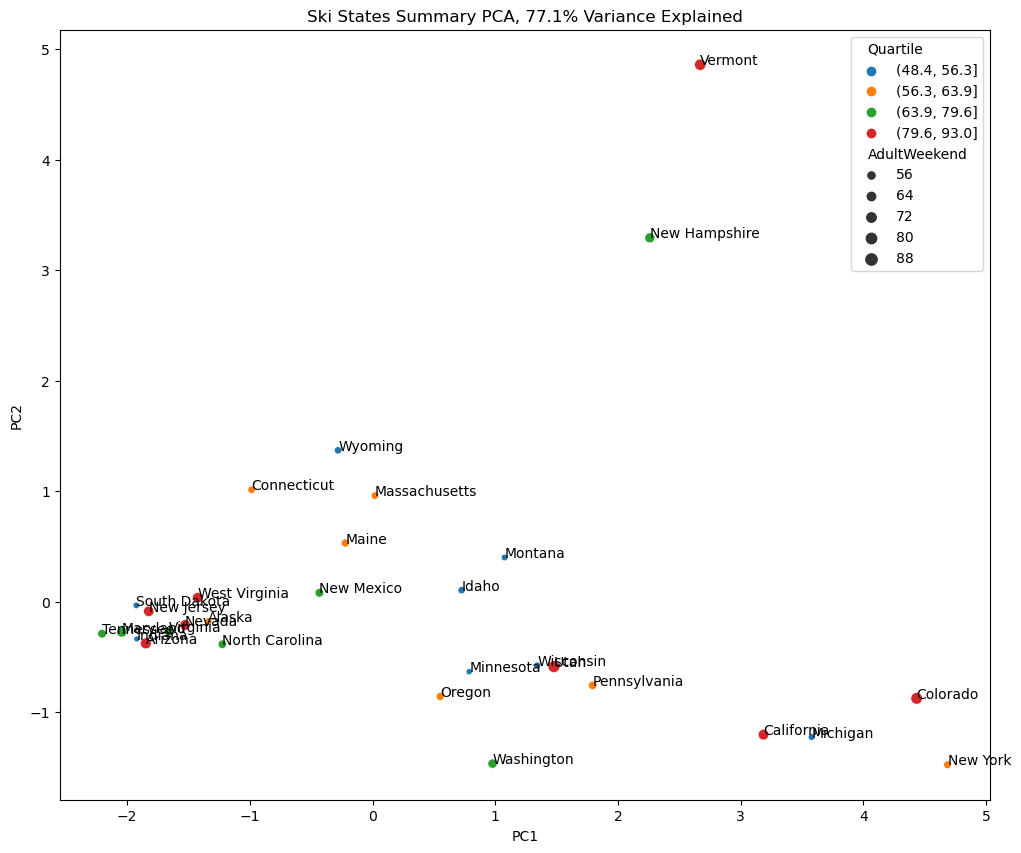

In [260]:
# Create a seaborn scatterplot by calling `sns.scatterplot`
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x=x, y=y, size='AdultWeekend', hue='Quartile', 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Ski States Summary PCA, {pc_var:.1f}% Variance Explained');

Once again, little in the way of a generalized pattern is exhibited by the data. Lower ticket price resorts seem to cluster in the middle of the plot. Variance with respect to California, Michigan, Colorado, and New York seem to dominated by PC1, while PC2 is vital to understanding the variance of New Hampshire and Vermont. A distinctive cluster on the far left includes resorts at different price points and in different geographical regions.

We can examine the contents of the principal components to identify the feature(s) that best explain the observed variance.

In [261]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.486285,0.311084,0.490065,0.487568,0.337788,0.191142,0.195526
1,-0.091373,-0.128372,-0.044154,-0.044129,-0.363549,0.662477,0.632638
2,-0.174837,0.729823,0.113447,-0.005978,-0.482476,0.220286,-0.377593
3,0.058371,-0.129422,-0.173057,-0.179294,0.448058,0.683146,-0.500303
4,-0.193396,0.558532,-0.248170,-0.399006,0.505504,-0.076167,0.410499
5,-0.795326,-0.058611,0.099035,0.538666,0.245955,0.059570,-0.003317
6,-0.226402,-0.148198,0.802291,-0.527997,0.064538,0.004998,-0.011753


It looks like `resorts_per_100kcapita` and `resorts_per_100ksq_mile` might count for quite a lot, in a positive sense.  Sign matters in this context. A large negative coefficient multiplied by a large negative feature produces a large positive PCA score.

Let's examine our two outliers to see if they are consistent with our above assertion. Both New Hampshire and Vermont seem to have relative high numbers of resorts per capita and resorts per square mile in levels. 

In [262]:
state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area_ac,3427.0,7239.0
state_total_days_open,1847.0,1777.0
state_total_terrain_parks,43.0,50.0
state_total_nightskiing_ac,376.0,50.0
resorts_per_100kcapita,1.176721,2.403889
resorts_per_100ksq_mile,171.141299,155.990017


Indeed, both states' large value for `resorts_per_100ksq_mile` in absolute terms puts them more than 3 standard deviations from the mean.  But what do the data tell us after they have been scaled?

In [263]:
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
resorts_per_state,0.841409,0.714472
state_total_skiable_area_ac,-0.270106,0.121224
state_total_days_open,1.136735,1.051531
state_total_terrain_parks,0.927813,1.241783
state_total_nightskiing_ac,-0.246788,-0.748365
resorts_per_100kcapita,1.710326,4.226004
resorts_per_100ksq_mile,3.482510,3.112084


Vermont stands out on both resorts per 100k square miles and resorts per 100k people, however, New Hampshire has slightly more resorts per capita.

### 3.5.4 Conclusion On How To Handle State Label<a id='3.5.4_Conclusion_On_How_To_Handle_State_Label'></a>

Having examined our pricing data, we are now at a major decision point.  Do we model at the national or local levels?

### 3.5.5 Ski Resort Numeric Data<a id='3.5.5_Ski_Resort_Numeric_Data'></a>

The previous EDA gave us some potentially useful features, as well as validating an approach for how to subsequently handle the state labels in our modeling. Let's return to examining data.

In [264]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


#### 3.5.5.1 Feature engineering<a id='3.5.5.1_Feature_engineering'></a>

Having previously explored state-level data, we turn our attention to resort-level data.  This will help us to determine, for example, whether or not to use state as a variable.  It's now time to merge the two datasets and engineer some features.

In [265]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,20,21148.0,2583.0,78.0,587.0,0.050617,12.217844
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


We begin by merging the data we have

In [266]:
# here 'state' is a column (not an index)
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


Having merged state-summary features into the ski resort data, we'll add "state resort competition" features:

* ratio of resort skiable area to total state skiable area
* ratio of resort days open to total state days open
* ratio of resort terrain park count to total state terrain park count
* ratio of resort night skiing area to total state night skiing area

Once we've derived these features, we situate each resort within the context of its local market and drop the raw, state-specific columns used in our feature engineering.  Their main purpose was to understand what share of states' skiing "assets" is accounted for by each resort.

In [267]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

We used the heat map below to reveal correlations among variables. It will later help us circumvent multicolinearity when modeling.

/var/folders/y_/hz1vxjzs1cs561dcc_gdd8k00000gn/T/ipykernel_58170/381154359.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ski_data.corr());


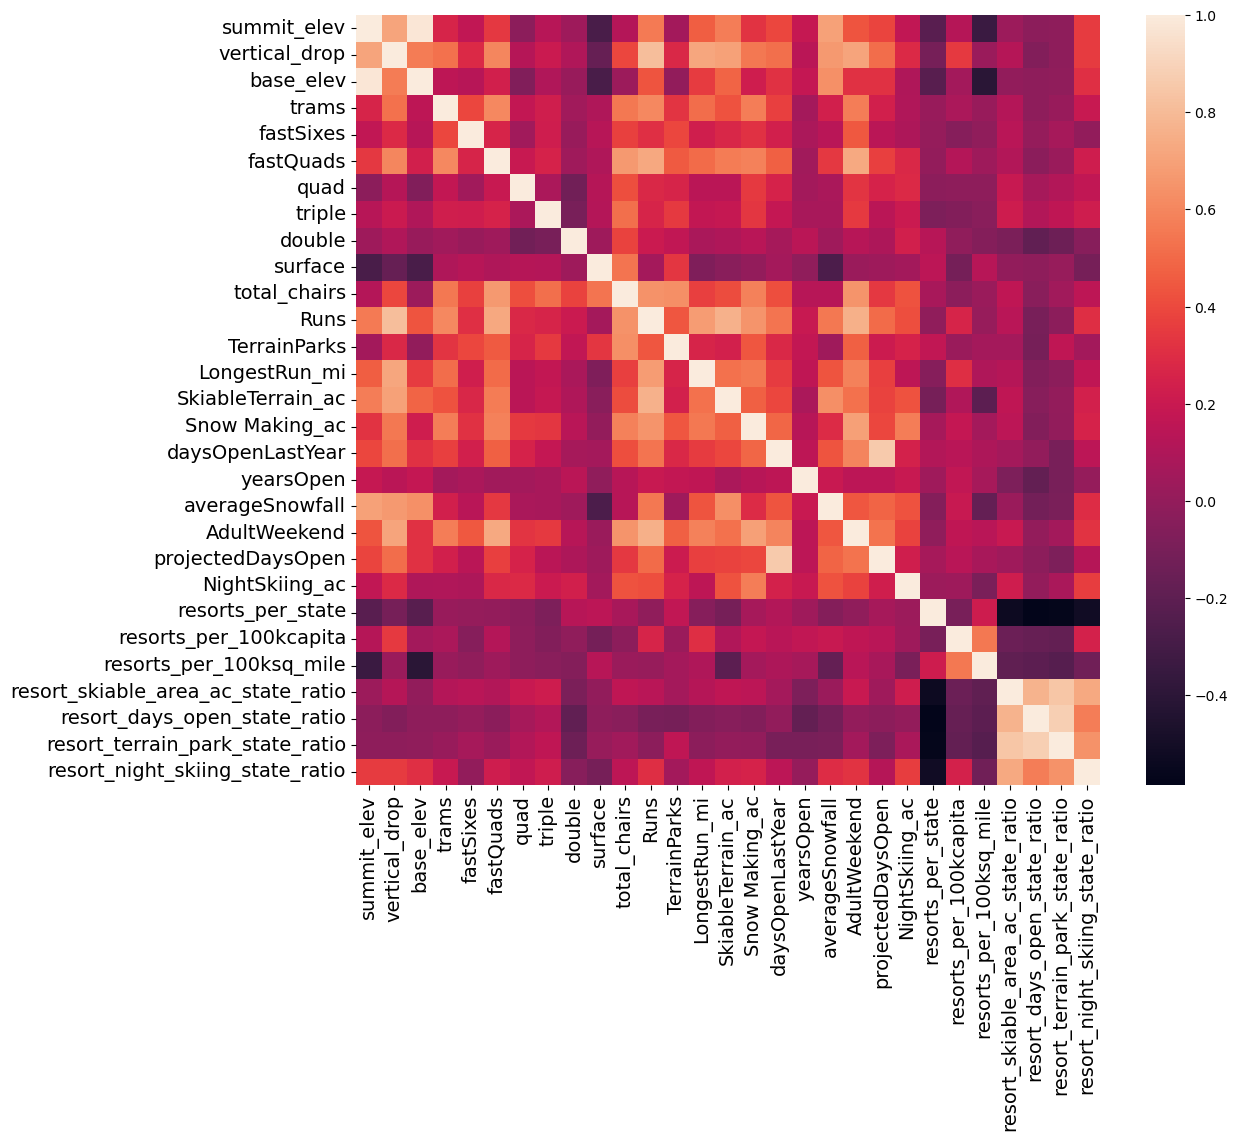

In [268]:
# Show a seaborn heatmap of correlations in ski_data
# Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(ski_data.corr());
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

There is a lot to unpack here. First, summit and base elevation are highly correlated (light colors equate to high levels of correlation). This isn't a surprise. We can see that we've introduced a lot of multicollinearity with our new ratio features; they are negatively correlated with the number of resorts in each state. The data make sense: If we increase the number of resorts in a state, the share of all other state features will drop for each individual resort. An interesting observation in this region of the heatmap is that there is some positive correlation between the ratio of night skiing area with the number of resorts per capita. Restated, greater resort density with respect to population yields more night skiing is provided.

Turning our attention to our target feature, `AdultWeekend` ticket price, we see quite a few reasonable correlations. `fastQuads` stands out, along with `Runs` and `Snow Making_ac`. The last one is particularly interesting. Visitors seem to value more "guaranteed" snow, which would drive up resort costs and ticket prices. Of the new features, `resort_night_skiing_state_ratio` seems the most correlated with ticket price. If this is true, then perhaps seizing a greater share of night skiing capacity means the resort can charge more, as it should.

`Runs` and `total_chairs` are also well correlated with ticket price. This is plausible; the more runs you have, the more chairs you'd need to ferry people to them!  In fact, they may count for more than `SkiableTerrain_ac`. While we are on the subject, `SkiableTerrain_ac` appears less useful than snow making. People seem to put more value in guaranteed snow cover, rather than more terrain.

Our `vertical_drop` seems to be a selling point that raises ticket prices as well.

#### 3.5.5.3 Scatterplots of numeric features against ticket price<a id='3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price'></a>

Correlation can mask relationships between two variables. Below, we present a series of scatterplots to divine how ticket price varies with other numeric features.

In [269]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [270]:
features = [var for var in ski_data.columns if var not in ['Name', 'Region', 'state', 'Adultweekend']]

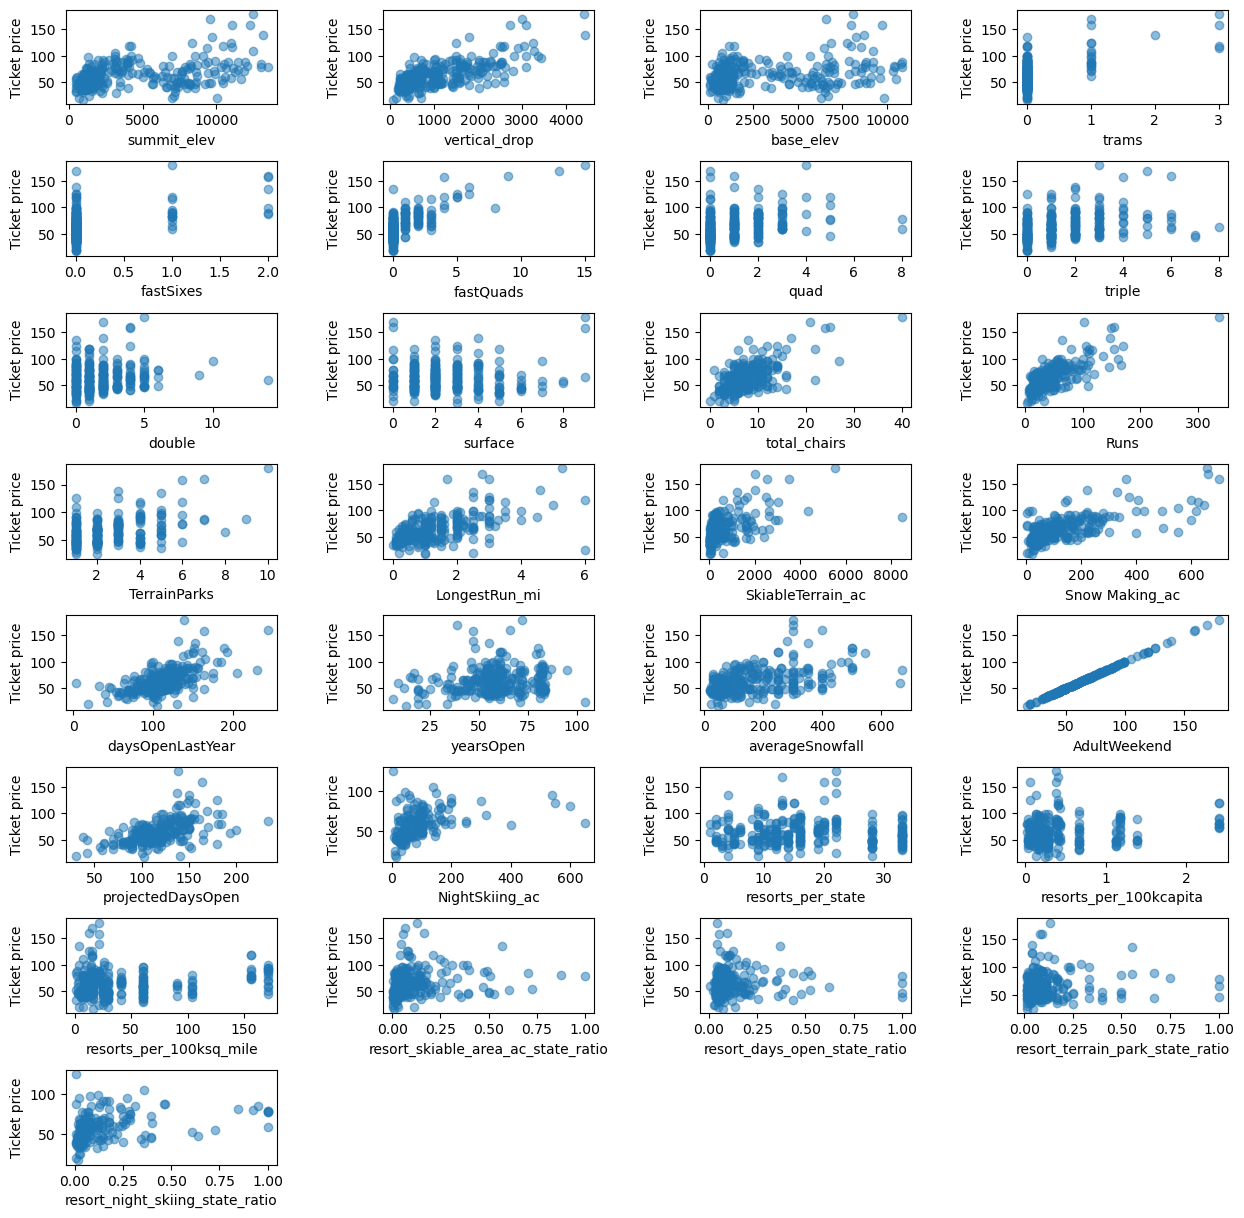

In [271]:
scatterplots(features, ncol=4, figsize=(15, 15))

In the scatterplots above, we see multiple high correlations. There's a strong positive correlation with `vertical_drop`. `fastQuads` seems very useful. `Runs` and `total_chairs` appear quite similar and also useful. `resorts_per_100kcapita` shows something interesting that we don't see from just a headline correlation figure. 

When the value is low, there is quite a variability in ticket price, although it's capable of going quite high. Ticket price may drop a little before then climbing upwards as the number of resorts per capita increases. Ticket price could climb with the number of resorts serving a population because it indicates a popular area for skiing with plenty of demand. The lower ticket price when fewer resorts serve a population may similarly be because it's a less popular state for skiing. The high price for some resorts when resorts are rare (relative to population size), which may indicate areas where a small number of resorts can benefit from a pseudo-monopoly.

Finally, we take a closer look at features that may be useful insofar as they relate to how easily a resort can transport people.  We have the number of various chairs and runs, but lack the ratio of chairs to runs.  It seems reasonable that this ratio would illuminate how easily, and quickly, people could get to their next ski slope!

In [272]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

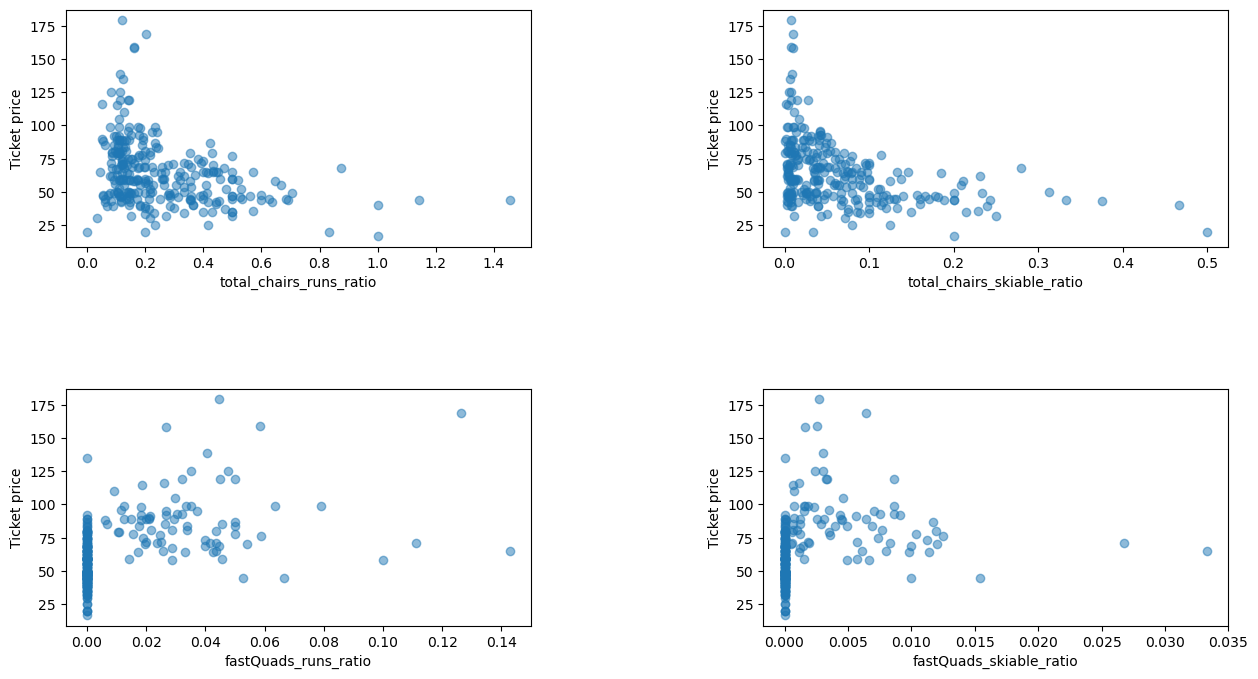

In [273]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

At first, these relationships seem counterintuitive: The more chairs a resort has to move people, relative to the number of runs, ticket price rapidly plummets and stays low. What we may be witnessing is an exclusive vs. mass market resort effect. Stated plainly, if a resort doesn't have a surfeit of chairs, it can charge more for its tickets, although with fewer chairs you're inevitably going to be able to serve fewer visitors. The price per visitor is high, but the number of visitors may be low. Something very useful that's missing from the data is the number of visitors per year for all resorts. Big Mountain sees approximately 350k visitors annually.

Lastly, having no fast quads may limit the ticket price, but if a resort covers a wide area, then maintaining a small number of fast quads may increase ticket price.

In [274]:
# Save the data 
datapath = '../data'
save_file(ski_data, 'ski_data_step3_features.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/ski_data_step3_features.csv"
